In [57]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sn

print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('scikit-learn version:', sk.__version__)
print('matplotlib version:', matplotlib.__version__)

%matplotlib inline

numpy version: 1.23.4
pandas version: 1.5.1
scikit-learn version: 1.1.3
matplotlib version: 3.6.2


In [10]:
dfRelevant = pd.DataFrame()

In [11]:
df = pd.read_csv("../data/IGN_data.csv",index_col=0)


In [12]:
df.sample(10)

,game,developers,publishers,franchises,features,released_date,platform,genres,score,score_text,esrb,esrb_info
9696,Rock of the Dead,['Epicenter Studios'],"['UFO Interactive', 'Conspiracy Entertainment']",NaN,"['Local - Co-Op # of Players', 'Number Of Play...",2010-10-19 00:00:00,"['Xbox 360', 'PlayStation 3', 'Wii']",['Music'],5.0,mediocre,Teen,"['Blood; Crude Humor', 'Blood', 'Mild Lyrics',..."
7569,Jack the Ripper [2004],['Galilea Multimedia'],"['The Adventure Company', 'Wanadoo Edition']",NaN,"['Number Of Players', 'Memory Card']",2004-01-29 00:00:00,['PC'],['Adventure'],7.8,good,Teen,"['Blood and Gore', 'Suggestive Themes', 'Viole..."
11139,Pokemon Ruby Version,['Game Freak'],"['Nintendo', 'Ingram Entertainment']",['Pokemon'],['Number Of Players'],2002-12-31 00:00:00,['Game Boy Advance'],['RPG'],9.5,amazing,Everyone,NaN
1049,WildStar,['Carbine Studios'],['NCSoft'],NaN,NaN,2014-06-03 00:00:00,['PC'],['RPG'],8.7,great,Teen,"['Crude Humor', 'Fantasy Violence', 'Mild Bloo..."
3442,Birds of Steel,['Gaijin Entertainment'],['Konami'],NaN,NaN,2012-03-13 00:00:00,"['Xbox 360', 'PlayStation 3']",['Shooter'],8.5,great,Teen,"['Mild Language', 'Mild Suggestive Themes', 'V..."
8593,UEFA EURO 2004 Portugal,['EA Canada'],"['Electronic Arts', 'Ingram Entertainment']",NaN,"['Memory Card', 'Number Of Players', 'Memory B...",2004-05-04 00:00:00,"['PlayStation 2', 'PC', 'Xbox']",['Sports'],8.0,great,Everyone,['Mild Lyrics']
1441,Shinobi III: Return of the Ninja Master,"['SEGA', 'SEGA-AM7']",['SEGA'],['Shinobi'],NaN,1994-05-18 00:00:00,"['iPhone', 'PC', 'Wii', 'Genesis']",['Action'],6.5,okay,NaN,NaN
6538,Trivial Pursuit,"['Electronic Arts', 'EA Mobile']","['Electronic Arts', 'EA Mobile']",NaN,"['1080p', 'Number Of Players', '720p', 'Local ...",2008-09-25 00:00:00,"['Wireless', 'iPhone', 'PlayStation 2', 'Wii',...","['Trivia', 'Board Game']",7.8,good,Everyone,"['Alcohol Reference', 'Comic Mischief']"
10675,Ridge Racer 3D,['Bandai Namco Games'],['Bandai Namco Games'],['Ridge Racer'],"['Number Of Players', 'Local - VS # of Players...",2011-02-26 00:00:00,['Nintendo 3DS'],['Racing'],8.0,great,Everyone,['Mild Suggestive Themes']
2731,Trespasser,['DreamWorks Interactive'],['Electronic Arts'],['Jurassic Park / Jurassic World'],['EAX'],1998-10-28 00:00:00,['PC'],['Action'],4.7,bad,Teen,"['Animated Violence', 'Blood']"


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11362 entries, 0 to 11361
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   game           11362 non-null  object 
 1   developers     11050 non-null  object 
 2   publishers     11282 non-null  object 
 3   franchises     6165 non-null   object 
 4   features       8668 non-null   object 
 5   released_date  11307 non-null  object 
 6   platform       11362 non-null  object 
 7   genres         11339 non-null  object 
 8   score          11319 non-null  float64
 9   score_text     11319 non-null  object 
 10  esrb           9490 non-null   object 
 11  esrb_info      8569 non-null   object 
dtypes: float64(1), object(11)
memory usage: 1.1+ MB


here I take out all the null values of the values I think is important

In [14]:
dfPub = df
dfPub = dfPub[dfPub.publishers.notna()]
dfDates = dfPub
dfDates = dfPub[dfPub.released_date.notna()]
dfGenres = dfDates
dfGenres = dfDates[dfDates.genres.notna()]
dfFeatures = dfGenres
dfFeatures = dfFeatures[dfFeatures.features.notna()]
dfScore = dfFeatures
dfScore = dfScore[dfScore.score.notna()]
dfScore.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 8584 entries, 0 to 11359
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   game           8584 non-null   object 
 1   developers     8467 non-null   object 
 2   publishers     8584 non-null   object 
 3   franchises     4700 non-null   object 
 4   features       8584 non-null   object 
 5   released_date  8584 non-null   object 
 6   platform       8584 non-null   object 
 7   genres         8584 non-null   object 
 8   score          8584 non-null   float64
 9   score_text     8584 non-null   object 
 10  esrb           7476 non-null   object 
 11  esrb_info      6771 non-null   object 
dtypes: float64(1), object(11)
memory usage: 871.8+ KB


In [15]:
shape = dfScore.shape


dfRelevant["released_date_f"] = pd.to_datetime(dfScore["released_date"]).astype(int) / 10**9
# creating a column with datetime properly formatted

# creating predictors to build basic ML model that we can add further complexity to later

# dfGenres["publishers_f"] =dfGenres["publishers"].astype("category").cat.codes # ->one hot encoding
# dfGenres["features_f"] = dfGenres["features"].astype("category").cat.codes # ->one hot encoding
# dfGenres["platform_f"] = dfGenres["platform"].astype("category").cat.codes # ->one hot encoding
# dfGenres["genres_f"] = dfGenres["genres"].astype("category").cat.codes # ->one hot encoding
dfRelevant["esrb_f"] = dfScore["esrb"].astype("category").cat.codes
dfRelevant["score_text_f"] = dfGenres["score_text"].astype("category").cat.codes
dfRelevant["franchises_f"] = dfScore["franchises"].astype("category").cat.codes
#converting from string to categories and then converting those categoties to numbers

## One hot encoding

In [51]:
dfHotFeatures = pd.DataFrame()
dfHotFeatures['score'] = dfScore['score']

In [52]:
for row in dfScore.features:
         if (row):
                row_ = row.strip('[]')
                row_ = row.replace("'", "")
                rowArr = row_.split(',')
                for feature in rowArr:
                    feature = feature.replace('[', "")
                    feature = feature.replace(']', "")
                    dfRelevant.loc[dfFeatures['features'] == row, feature] = 1
                    dfHotFeatures.loc[dfFeatures['features'] == row, feature] = 1
                    


/tmp/ipykernel_905/258014733.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfHotFeatures.loc[dfFeatures['features'] == row, feature] = 1
/tmp/ipykernel_905/258014733.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfHotFeatures.loc[dfFeatures['features'] == row, feature] = 1
/tmp/ipykernel_905/258014733.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

Here I show the relation between the score and hot encoded features

(8584, 170)


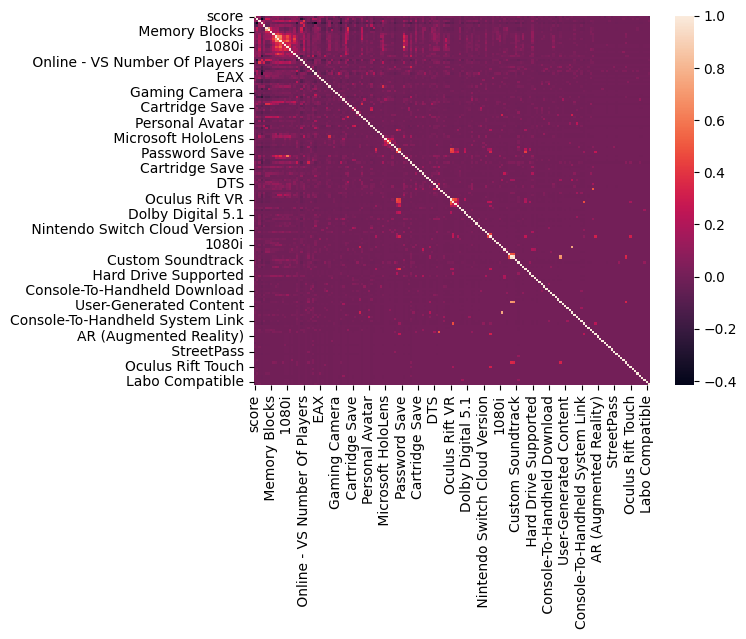

In [56]:
print(dfHotFeatures.shape)
dfHotFeatures = dfHotFeatures.fillna(0)
columns = dfRelevant.shape[1]

dfTemp = dfHotFeatures
corr_matrix = dfTemp.corr()
sn.heatmap(corr_matrix, annot=False)
plt.show()


In [58]:
dfHotPublishers = pd.DataFrame()
dfHotPublishers['score'] = dfScore['score']

In [59]:
for row in dfScore.publishers:
         if (row):
                row_ = row.replace('[', "")
                row_ = row.replace(']', "")
                row_ = row.replace("'", "")
                rowArr = row_.split(',')
                for publisher in rowArr:
                    publisher = publisher.replace('[', "")
                    publisher = publisher.replace(']', "")
                    dfRelevant.loc[dfFeatures['publishers'] == row, publisher] = 1
                    dfHotPublishers.loc[dfFeatures['publishers'] == row, publisher] = 1


/tmp/ipykernel_905/1283726090.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfHotPublishers.loc[dfFeatures['publishers'] == row, publisher] = 1
/tmp/ipykernel_905/1283726090.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfHotPublishers.loc[dfFeatures['publishers'] == row, publisher] = 1
/tmp/ipykernel_905/1283726090.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

(8584, 1757)


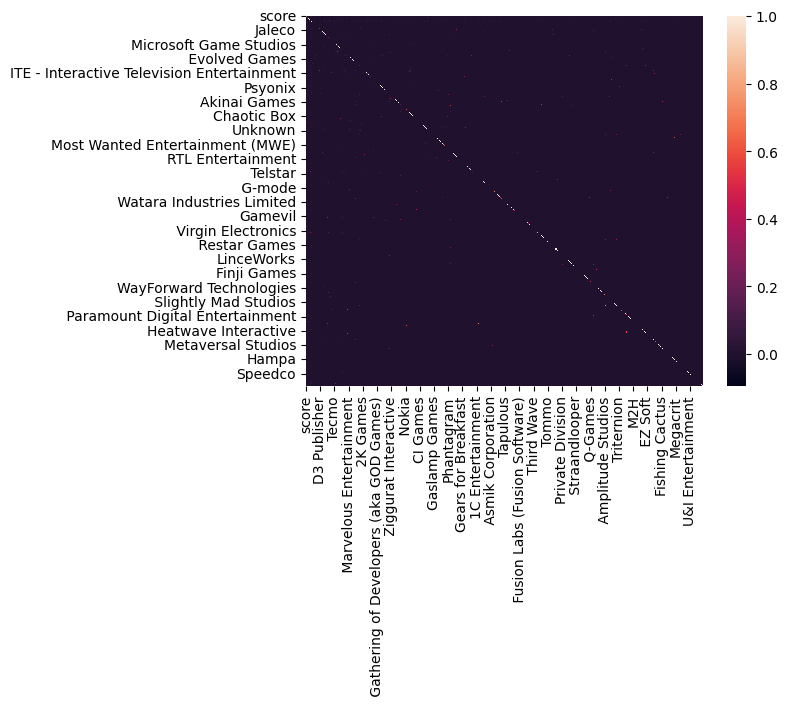

In [60]:
print(dfHotPublishers.shape)
dfHotPublishers = dfHotPublishers.fillna(0)
dfTemp = dfHotPublishers
corr_matrix = dfTemp.corr()
sn.heatmap(corr_matrix, annot=False)
plt.show()


In [61]:
dfHotPlatform = pd.DataFrame()
dfHotPlatform['score'] = dfScore['score']

In [62]:
for row in dfScore.platform:
         if (row):
                row_ = row.replace('[', "")
                row_ = row.replace(']', "")
                row_ = row.replace("'", "")
                rowArr = row_.split(',')
                for platform in rowArr:
                    platform = platform.replace('[', "")
                    platform = platform.replace(']', "")
                    dfRelevant.loc[dfFeatures['platform'] == row, platform] = 1
                    dfHotPlatform.loc[dfFeatures['platform'] == row, platform] = 1


(8584, 87)


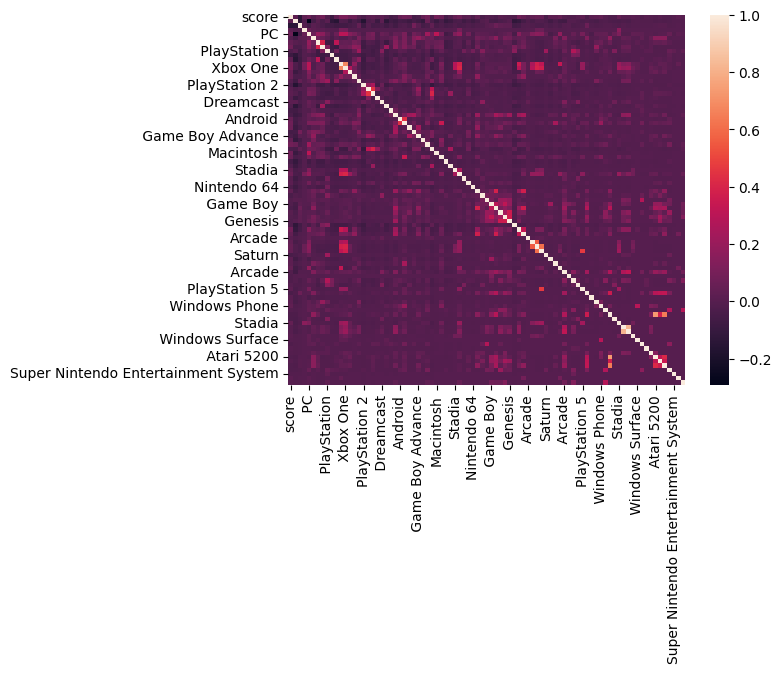

In [63]:
print(dfHotPlatform.shape)
dfHotPlatform = dfHotPlatform.fillna(0)
dfTemp = dfHotPlatform
corr_matrix = dfTemp.corr()
sn.heatmap(corr_matrix, annot=False)
plt.show()

In [19]:
for row in dfScore.genres:
         if (row):
                row_ = row.replace('[', "")
                row_ = row.replace(']', "")
                row_ = row.replace("'", "")
                rowArr = row_.split(',')
                for genre_ in rowArr:
                    genre_ = genre_.replace('[', "")
                    genre_ = genre_.replace(']', "")
                    dfRelevant.loc[dfFeatures['genres'] == row, genre_] = 1


/tmp/ipykernel_905/2211323099.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfRelevant.loc[dfFeatures['genres'] == row, genre_] = 1
/tmp/ipykernel_905/2211323099.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfRelevant.loc[dfFeatures['genres'] == row, genre_] = 1
/tmp/ipykernel_905/2211323099.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

In [20]:
dfRelevant

,released_date_f,esrb_f,score_text_f,franchises_f,Memory Card,Online,Number Of Players,Local - VS # of Players,Vibration,DualShock,...,Tower Defense,Fantasy,Driving,Word Game,Deckbuilder,Match-3,Poker,Soulslike,Boxing,Reality
0,9.267264e+08,5,3,-1,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.143590e+09,1,6,-1,NaN,NaN,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.224547e+09,3,4,463,1.0,1.0,NaN,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9.228384e+08,1,1,-1,NaN,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8.936352e+08,1,0,225,NaN,NaN,1.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11355,1.073866e+09,1,3,-1,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11356,3.786912e+08,-1,2,1325,NaN,NaN,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11357,1.057018e+09,5,8,-1,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11358,9.761472e+08,5,3,-1,NaN,NaN,1.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
dfRelevant.info()
dfRelevant = dfRelevant.fillna(0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8584 entries, 0 to 11359
Columns: 2157 entries, released_date_f to  Reality
dtypes: float64(2154), int16(1), int8(2)
memory usage: 141.2 MB


In [46]:
corr_matrix = corr_matrix.replace(to_replace=1, value=-1)
corr_matrix = corr_matrix.reset_index(drop=True)
inloop = 0
for columns in corr_matrix.items():
   if(inloop):
   # print(columns)
      print(max(columns))
   inloop=1

TypeError: Invalid comparison between dtype=float64 and str

In [ ]:
from sklearn.model_selection import train_test_split
scoring_X = dfRelevant
scoring_y = (dfScore['score']*10).astype(int)

X_train_scoring, X_test_scoring, y_train_scoring, y_test_scoring = train_test_split(scoring_X, scoring_y, test_size=0.2)

In [ ]:
X_test_scoring

,released_date_f,esrb_f,score_text_f,franchises_f,Memory Card,Online,Number Of Players,Local - VS # of Players,Vibration,DualShock,...,Tower Defense,Fantasy,Driving,Word Game,Deckbuilder,Match-3,Poker,Soulslike,Boxing,Reality
10532,1.224547e+09,1,7,369,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7628,9.440064e+08,1,4,1091,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5149,1.004573e+09,1,0,199,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9313,1.290298e+09,2,3,986,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3636,8.818848e+08,1,4,1125,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10865,9.389088e+08,5,4,661,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9336,1.129594e+09,5,3,-1,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7306,1.158019e+09,1,3,411,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9128,1.151453e+09,5,3,625,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_test_scoring

10532    62
7628     88
5149     90
9313     70
3636     80
         ..
10865    85
9336     75
7306     79
9128     70
8531     90
Name: score, Length: 1717, dtype: int64

## data visualisation

In [ ]:
# dfTemp = X_test_scoring
# dfTemp["score"] = y_test_scoring # for some reason this adds the score line to the X_test_scoring dataframe as well???????

# ax1 = dfTemp.plot.scatter(x='franchises_f',y='score',c='esrb_f')
# ax2 = dfTemp.plot.scatter(x='esrb_f',y='score')
# ax3 = dfTemp.plot.scatter(x='esrb_f',y='franchises_f',c='score')
# ax4 = dfTemp.plot.scatter(x='franchises_f',y='released_date_f',c='score')

# ax5 = dfTemp.plot.scatter(x='score',y='released_date_f')


### Relevancy
these visualisations don't show a clear correlation between any of the prominent features. I hope maybe some of the other features like the genres or platforms have a significant influence on the score, but I highly doubt those will show any correlation either. I will explore this below in a correlation matrix.

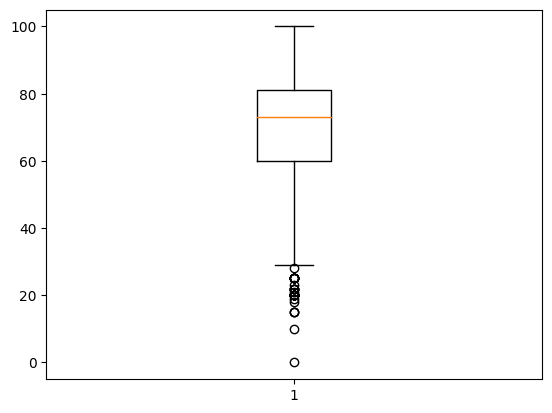

In [ ]:
plt.boxplot(dfTemp['score'])
plt.show()

### correlation matrix

here I try to look for correlation in the data to see what is relevant for the AI.

Because of the sheer amount of columns I have (almost 2000) I will split this up into several matrices or the kernel will crash because of too much data.

## DecisionTree and RandomForest

0.35177635410599883

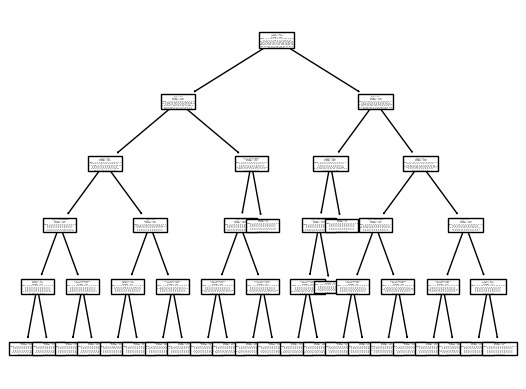

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


treeModel = DecisionTreeClassifier(criterion='entropy', max_depth=5)
treeModel.fit(X_train_scoring,y_train_scoring)
tree.plot_tree(treeModel)

y_pred_tree = treeModel.predict(X_test_scoring)
accuracy_score(y_test_scoring, y_pred_tree)

In [ ]:
rf = RandomForestClassifier(n_estimators=50, min_samples_split=2)
rf.fit(X_train_scoring,y_train_scoring)

y_pred = rf.predict(X_test_scoring)
accuracy_score(y_test_scoring, y_pred)

0.24111822947000583

## kNN